<a href="https://colab.research.google.com/github/3srava0/assignment-3/blob/main/04_Target_Variable_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Day 4: Target Variable Creation
# Real Estate Investment Advisor System
print("="*60)
print("TARGET VARIABLE CREATION")
print("="*60)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n✅ Libraries imported successfully!")


TARGET VARIABLE CREATION
Mounted at /content/drive

✅ Libraries imported successfully!


In [2]:
# Load the feature-engineered dataset
df = pd.read_csv('/content/drive/MyDrive/assignment-3/data/india_housing_prices_featured.csv')

print(f"Dataset loaded: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset loaded: (250000, 23)

Columns: ['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

First few rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move



CREATING TARGET: Future_Price_5Y (Regression)

✅ Future_Price_5Y created using 8.0% annual growth rate

Sample comparison:
   Price_in_Lakhs  Future_Price_5Y  Growth_Amount  Growth_Percentage
0          489.76       719.618119     229.858119          46.932808
1          195.52       287.283026      91.763026          46.932808
2          183.79       270.047807      86.257807          46.932808
3          300.29       441.224528     140.934528          46.932808
4          182.90       268.740105      85.840105          46.932808
5          135.28       198.770702      63.490702          46.932808
6          318.12       467.422648     149.302648          46.932808
7          141.39       207.748297      66.358297          46.932808
8          189.16       277.938099      88.778099          46.932808
9          187.42       275.381468      87.961468          46.932808


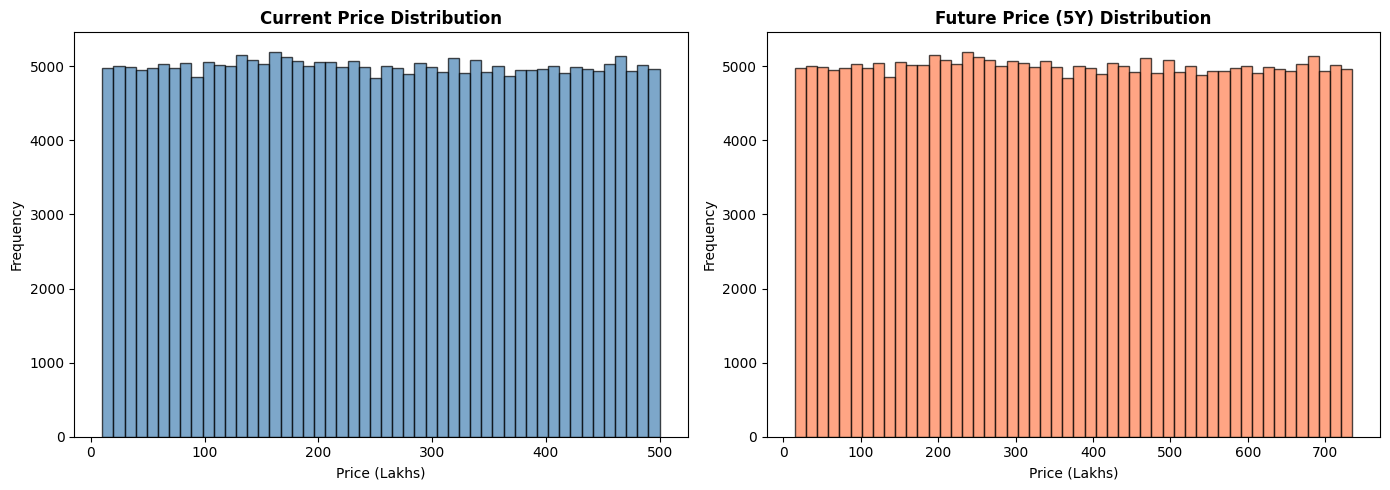


Current Price Stats:
count    250000.000000
mean        254.586854
std         141.349921
min          10.000000
25%         132.550000
50%         253.870000
75%         376.880000
max         500.000000
Name: Price_in_Lakhs, dtype: float64

Future Price (5Y) Stats:
count    250000.000000
mean        374.071613
std         207.689408
min          14.693281
25%         194.759437
50%         373.018319
75%         553.760366
max         734.664038
Name: Future_Price_5Y, dtype: float64


In [3]:
# Create Future_Price_5Y - Predict property price after 5 years
print("\n" + "="*60)
print("CREATING TARGET: Future_Price_5Y (Regression)")
print("="*60)

# Method 1: Fixed Growth Rate (8% annually)
annual_growth_rate = 0.08
years = 5

df['Future_Price_5Y'] = df['Price_in_Lakhs'] * (1 + annual_growth_rate) ** years

print(f"\n✅ Future_Price_5Y created using {annual_growth_rate*100}% annual growth rate")
print(f"\nSample comparison:")
comparison_df = df[['Price_in_Lakhs', 'Future_Price_5Y']].head(10)
comparison_df['Growth_Amount'] = comparison_df['Future_Price_5Y'] - comparison_df['Price_in_Lakhs']
comparison_df['Growth_Percentage'] = ((comparison_df['Future_Price_5Y'] / comparison_df['Price_in_Lakhs']) - 1) * 100
print(comparison_df)

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Price_in_Lakhs'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Current Price Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price (Lakhs)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)

axes[1].hist(df['Future_Price_5Y'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Future Price (5Y) Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Price (Lakhs)', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nCurrent Price Stats:")
print(df['Price_in_Lakhs'].describe())
print(f"\nFuture Price (5Y) Stats:")
print(df['Future_Price_5Y'].describe())



CREATING TARGET: Good_Investment (Classification)
Calculating investment criteria...

✅ Good_Investment target created (VECTORIZED)

Investment Distribution:
Good_Investment
1    152786
0     97214
Name: count, dtype: int64

Percentage:
Good_Investment
1    61.1144
0    38.8856
Name: proportion, dtype: float64

Criteria Breakdown:
Criterion 1 (Affordable): 124984 properties
Criterion 2 (BHK >= 2): 199804 properties
Criterion 3 (Age < 15): 95660 properties
Criterion 4 (Good price/sqft): 114925 properties
Criterion 5 (Parking/Security): 187238 properties


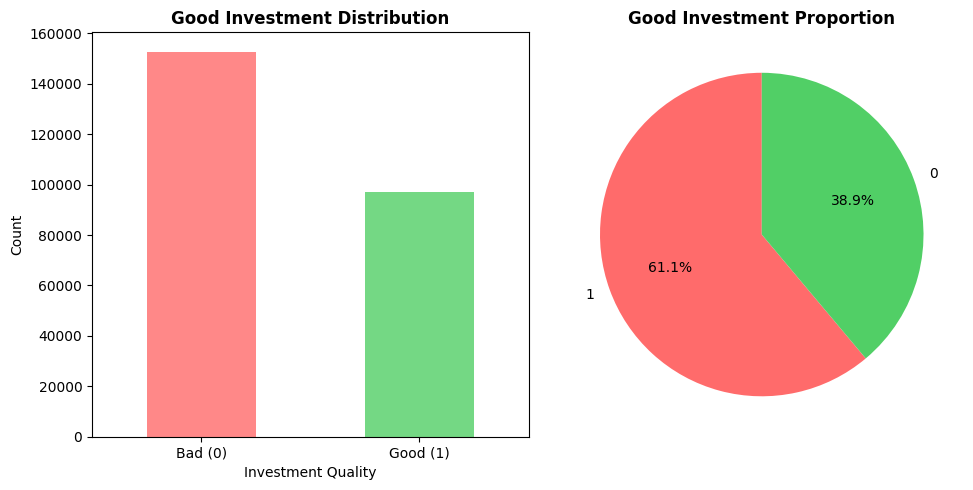

In [4]:
# Create Good_Investment - Binary classification target (VECTORIZED - FAST!)
print("\n" + "="*60)
print("CREATING TARGET: Good_Investment (Classification)")
print("="*60)

# Calculate median price per city for comparison
df['City_Median_Price'] = df.groupby('City')['Price_in_Lakhs'].transform('median')
df['City_Median_Price_per_SqFt'] = df.groupby('City')['Price_per_SqFt'].transform('median')

print("Calculating investment criteria...")

# VECTORIZED APPROACH (Much faster!)
score = 0

# Criterion 1: Affordable (price below city median)
criterion_1 = (df['Price_in_Lakhs'] < df['City_Median_Price']).astype(int)

# Criterion 2: Reasonable size (BHK >= 2)
criterion_2 = (df['BHK'] >= 2).astype(int)

# Criterion 3: Newer property (age < 15 years)
criterion_3 = (df['Age_of_Property'] < 15).astype(int)

# Criterion 4: Good price efficiency
criterion_4 = (df['Price_per_SqFt'] < df['City_Median_Price_per_SqFt']).astype(int)

# Criterion 5: Has parking or security
criterion_5 = ((df['Parking_Space'] == 'Yes') | (df['Security'] == 'Yes')).astype(int)

# Calculate total score
total_score = criterion_1 + criterion_2 + criterion_3 + criterion_4 + criterion_5

# Good investment if meets at least 3 out of 5 criteria
df['Good_Investment'] = (total_score >= 3).astype(int)

print(f"\n✅ Good_Investment target created (VECTORIZED)")
print(f"\nInvestment Distribution:")
print(df['Good_Investment'].value_counts())
print(f"\nPercentage:")
print(df['Good_Investment'].value_counts(normalize=True) * 100)

# Show criteria breakdown
print(f"\nCriteria Breakdown:")
print(f"Criterion 1 (Affordable): {criterion_1.sum()} properties")
print(f"Criterion 2 (BHK >= 2): {criterion_2.sum()} properties")
print(f"Criterion 3 (Age < 15): {criterion_3.sum()} properties")
print(f"Criterion 4 (Good price/sqft): {criterion_4.sum()} properties")
print(f"Criterion 5 (Parking/Security): {criterion_5.sum()} properties")

# Visualize distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Good_Investment'].value_counts().plot(kind='bar', color=['#ff6b6b', '#51cf66'], alpha=0.8)
plt.title('Good Investment Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Investment Quality', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Bad (0)', 'Good (1)'], rotation=0)

plt.subplot(1, 2, 2)
df['Good_Investment'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                          colors=['#ff6b6b', '#51cf66'],
                                          startangle=90)
plt.title('Good Investment Proportion', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()



GOOD INVESTMENT ANALYSIS BY CATEGORIES

1. Good Investment by Property Type:
Good_Investment        0      1
Property_Type                  
Apartment          38.87  61.13
Independent House  39.15  60.85
Villa              38.64  61.36

2. Good Investment by City (Top 10):
City
Pune         63.12
Mangalore    62.42
Guwahati     61.84
Bilaspur     61.78
Haridwar     61.72
Hyderabad    61.69
Jaipur       61.68
Kochi        61.67
Faridabad    61.61
Gurgaon      61.59
Name: Good_Investment, dtype: float64

3. Good Investment by BHK:
Good_Investment      0      1
BHK                          
1                62.11  37.89
2                33.09  66.91
3                33.27  66.73
4                32.72  67.28
5                33.13  66.87


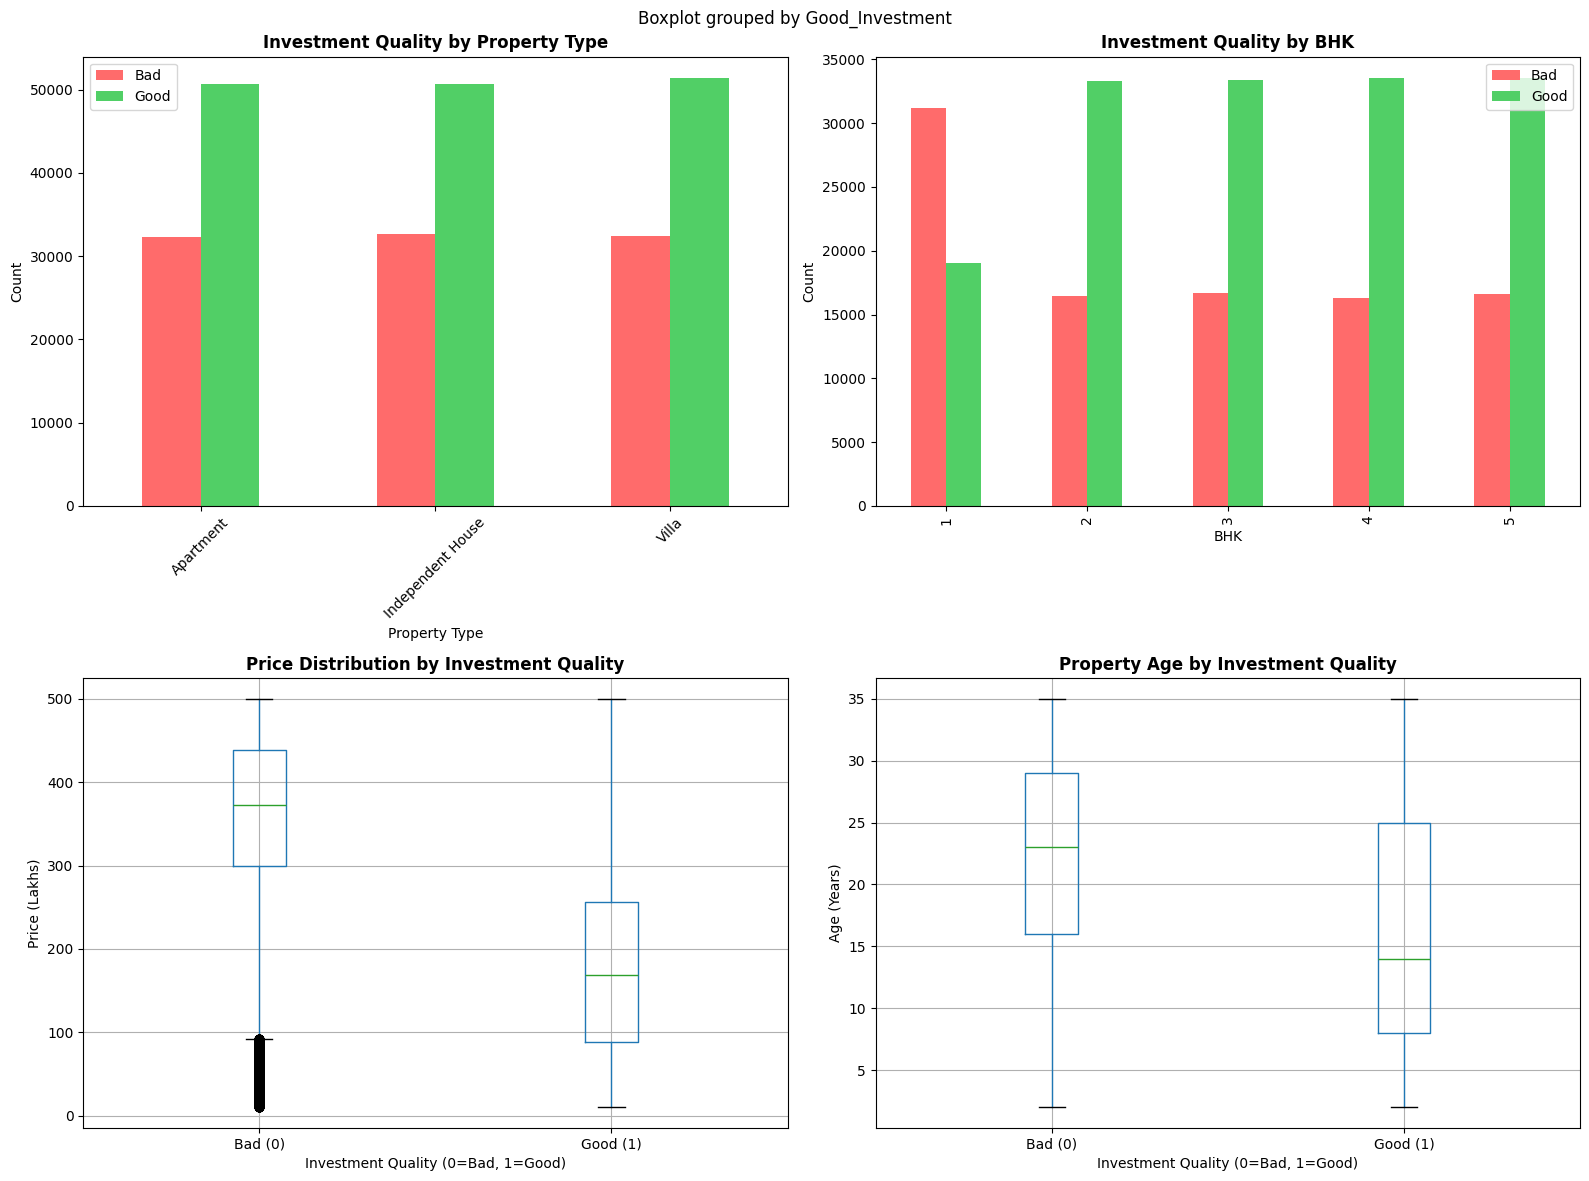

In [5]:
# Analyze good investment patterns
print("\n" + "="*60)
print("GOOD INVESTMENT ANALYSIS BY CATEGORIES")
print("="*60)

# By Property Type
print("\n1. Good Investment by Property Type:")
investment_by_type = pd.crosstab(df['Property_Type'], df['Good_Investment'],
                                  normalize='index') * 100
print(investment_by_type.round(2))

# By City (top 10)
print("\n2. Good Investment by City (Top 10):")
investment_by_city = df.groupby('City')['Good_Investment'].mean().sort_values(ascending=False).head(10) * 100
print(investment_by_city.round(2))

# By BHK
print("\n3. Good Investment by BHK:")
investment_by_bhk = pd.crosstab(df['BHK'], df['Good_Investment'],
                                normalize='index') * 100
print(investment_by_bhk.round(2))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Property Type
investment_by_type_count = pd.crosstab(df['Property_Type'], df['Good_Investment'])
investment_by_type_count.plot(kind='bar', ax=axes[0, 0], color=['#ff6b6b', '#51cf66'])
axes[0, 0].set_title('Investment Quality by Property Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Property Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(['Bad', 'Good'])
axes[0, 0].tick_params(axis='x', rotation=45)

# BHK
investment_by_bhk_count = pd.crosstab(df['BHK'], df['Good_Investment'])
investment_by_bhk_count.plot(kind='bar', ax=axes[0, 1], color=['#ff6b6b', '#51cf66'])
axes[0, 1].set_title('Investment Quality by BHK', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('BHK')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['Bad', 'Good'])

# Price comparison
df.boxplot(column='Price_in_Lakhs', by='Good_Investment', ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution by Investment Quality', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Investment Quality (0=Bad, 1=Good)')
axes[1, 0].set_ylabel('Price (Lakhs)')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Bad (0)', 'Good (1)'])

# Age comparison
df.boxplot(column='Age_of_Property', by='Good_Investment', ax=axes[1, 1])
axes[1, 1].set_title('Property Age by Investment Quality', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Investment Quality (0=Bad, 1=Good)')
axes[1, 1].set_ylabel('Age (Years)')
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Bad (0)', 'Good (1)'])

plt.tight_layout()
plt.show()


In [6]:
# Check class balance for classification
print("\n" + "="*60)
print("CLASS BALANCE CHECK")
print("="*60)

good_count = (df['Good_Investment'] == 1).sum()
bad_count = (df['Good_Investment'] == 0).sum()
total = len(df)

print(f"\nGood Investment (1): {good_count} ({good_count/total*100:.2f}%)")
print(f"Bad Investment (0): {bad_count} ({bad_count/total*100:.2f}%)")
print(f"Imbalance Ratio: {max(good_count, bad_count) / min(good_count, bad_count):.2f}:1")

if abs(good_count - bad_count) / total > 0.3:
    print("\n⚠️ WARNING: Significant class imbalance detected!")
    print("Consider using techniques like:")
    print("  - SMOTE (Synthetic Minority Over-sampling)")
    print("  - Class weights in models")
    print("  - Stratified sampling")
else:
    print("\n✅ Classes are reasonably balanced")



CLASS BALANCE CHECK

Good Investment (1): 152786 (61.11%)
Bad Investment (0): 97214 (38.89%)
Imbalance Ratio: 1.57:1

✅ Classes are reasonably balanced


In [7]:
# Save the dataset with target variables
print("\n" + "="*60)
print("SAVING DATASET WITH TARGET VARIABLES")
print("="*60)

# Save to Google Drive
output_path = '/content/drive/MyDrive/assignment-3/data/data_with_targets.csv'
df.to_csv(output_path, index=False)

print(f"\n✅ Dataset saved successfully!")
print(f"Location: {output_path}")
print(f"Shape: {df.shape}")
print(f"\nNew columns added:")
print("  - Future_Price_5Y (Regression target)")
print("  - Good_Investment (Classification target)")
print("  - City_Median_Price (Helper column)")

# Display sample
print("\nSample data with targets:")
df[['Price_in_Lakhs', 'Future_Price_5Y', 'Good_Investment', 'City', 'BHK', 'Age_of_Property']].head(10)



SAVING DATASET WITH TARGET VARIABLES

✅ Dataset saved successfully!
Location: /content/drive/MyDrive/assignment-3/data/data_with_targets.csv
Shape: (250000, 27)

New columns added:
  - Future_Price_5Y (Regression target)
  - Good_Investment (Classification target)
  - City_Median_Price (Helper column)

Sample data with targets:


,Price_in_Lakhs,Future_Price_5Y,Good_Investment,City,BHK,Age_of_Property
0,489.76,719.618119,0,Chennai,1,35
1,195.52,287.283026,1,Pune,3,17
2,183.79,270.047807,1,Ludhiana,2,28
3,300.29,441.224528,0,Jodhpur,2,34
4,182.90,268.740105,1,Jaipur,4,23
5,135.28,198.770702,1,Durgapur,4,5
6,318.12,467.422648,1,Coimbatore,3,9
7,141.39,207.748297,1,Bilaspur,5,4
8,189.16,277.938099,1,New Delhi,4,22
9,187.42,275.381468,1,Ranchi,2,14


In [8]:
# Final summary
print("\n" + "="*60)
print("TARGET VARIABLES SUMMARY")
print("="*60)

summary_stats = pd.DataFrame({
    'Target Variable': ['Future_Price_5Y', 'Good_Investment'],
    'Type': ['Regression (Continuous)', 'Classification (Binary)'],
    'Min': [df['Future_Price_5Y'].min(), df['Good_Investment'].min()],
    'Max': [df['Future_Price_5Y'].max(), df['Good_Investment'].max()],
    'Mean': [df['Future_Price_5Y'].mean(), df['Good_Investment'].mean()],
    'Unique Values': [df['Future_Price_5Y'].nunique(), df['Good_Investment'].nunique()]
})

print("\n", summary_stats.to_string(index=False))

print("\n" + "="*60)
print("✅ TARGET VARIABLE CREATION COMPLETE!")
print("="*60)
print("\nNext Step: Build Classification and Regression Models")



TARGET VARIABLES SUMMARY

 Target Variable                    Type       Min        Max       Mean  Unique Values
Future_Price_5Y Regression (Continuous) 14.693281 734.664038 374.071613          48700
Good_Investment Classification (Binary)  0.000000   1.000000   0.611144              2

✅ TARGET VARIABLE CREATION COMPLETE!

Next Step: Build Classification and Regression Models
